In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.model_selection import train_test_split

# Veri kümesini yükleyelim
dataset = sio.loadmat('ex4data1.mat')

# m = kaç tane resmimiz var?
m = dataset['X'].shape[0]

x, val_x, y, val_y = train_test_split(dataset['X'], dataset['y'], test_size=0.2, random_state=42)

x = x / 256
val_x = val_x / 256

"""
# ver kümesini train/validation diye ikiye ayıralım
x = dataset['X'][:round(m*0.8), :] / 256
val_x = dataset['X'][round(m*0.8):, :] / 256

y = dataset['y'][:round(m*0.8), :]
val_y = dataset['y'][round(m*0.8):, :]
"""

# Girdi ve Çıktı Boyutlarını girelim
N, D_in, H, D_out = m, 400, 100, 10

In [23]:
# Ağırlıklar rasgele ilk değerler atanmıştır
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)


In [24]:
# Non-linearity Fonksiyonumuz : ReLU
def relu(x):
    return np.maximum(x, 0)

In [25]:
# Loss değerleri listesi 
j_history =  []


learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    y_pred = relu(h).dot(w2)
    
    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)
    j_history.append(loss)

    # Loss'un w1 ve w2' ye göre türevleri
    
    # Loss türev
    grad_y_pred = 2.0 * (y_pred - y)
    
    # türev w2 
    grad_w2 = relu(h).T.dot(grad_y_pred)
    
    grad_h_relu = grad_y_pred.dot(w2.T)
    
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    
    grad_w1 = x.T.dot(grad_h)
    
    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 1518021.888938802
1 1517519.971537429
2 1517018.1908339036
3 1516516.5464764463
4 1516014.9943092666
5 1515513.451778578
6 1515011.861982245
7 1514510.3505050365
8 1514008.8304719967
9 1513507.3531154967
10 1513005.8773071417
11 1512504.398542946
12 1512002.9121685147
13 1511501.428284809
14 1510999.9157142332
15 1510498.3650712147
16 1509996.7572092693
17 1509495.09494153
18 1508993.395946507
19 1508491.5618379281
20 1507989.5941673894
21 1507487.5712457637
22 1506985.4420047957
23 1506483.1776016967
24 1505980.7859771675
25 1505478.2052127214
26 1504975.45722314
27 1504472.5813846788
28 1503969.5133496039
29 1503466.3034749203
30 1502962.965743376
31 1502459.4765309999
32 1501955.7349352129
33 1501451.7299625701
34 1500947.530904049
35 1500443.1265727936
36 1499938.502785999
37 1499433.5765222167
38 1498928.3910217714
39 1498422.903444528
40 1497917.2078640987
41 1497411.2728922104
42 1496905.075615138
43 1496398.5691595054
44 1495891.7234531008
45 1495384.5579882143
46 1494877.050

368 1260632.6306826635
369 1259532.4117616196
370 1258429.0470871744
371 1257322.641606879
372 1256213.1970890288
373 1255100.7415299488
374 1253985.2475893886
375 1252866.6302834505
376 1251744.9754573337
377 1250620.2601927554
378 1249492.4090439174
379 1248361.4325442847
380 1247227.3518563278
381 1246090.1873123646
382 1244949.8536382727
383 1243806.421333702
384 1242659.8865640438
385 1241510.1768439212
386 1240357.2194717773
387 1239201.063939887
388 1238041.7769603517
389 1236879.3479563317
390 1235713.745951755
391 1234544.958948211
392 1233372.967447985
393 1232197.731964639
394 1231019.3880141377
395 1229837.8877026015
396 1228653.244017732
397 1227465.4725811337
398 1226274.5739486667
399 1225080.5638317987
400 1223883.3809376804
401 1222682.9994855141
402 1221479.3494667178
403 1220272.5223439399
404 1219062.6320791198
405 1217849.553011571
406 1216633.371037378
407 1215414.1137232282
408 1214191.699892413
409 1212966.0674850906
410 1211737.2118239908
411 1210505.162969947


740 685477.2491900155
741 683847.9684161663
742 682221.1130053115
743 680596.6746470424
744 678974.7449962248
745 677355.298510894
746 675738.3522518302
747 674124.0028611149
748 672512.2092422685
749 670903.049843387
750 669296.5243290997
751 667692.6557966355
752 666091.4393933439
753 664492.8979386459
754 662897.0506681625
755 661303.9469022417
756 659713.6366744945
757 658126.0892143338
758 656541.3105110681
759 654959.3255328336
760 653380.2205772856
761 651803.9887972134
762 650230.6107272719
763 648660.1477096748
764 647092.6422431612
765 645528.0898709261
766 643966.4683931716
767 642407.829512371
768 640852.130552849
769 639299.4838192964
770 637749.8926729048
771 636203.3833106739
772 634659.8875557678
773 633119.4486753108
774 631582.1257835173
775 630047.9257725035
776 628516.846847626
777 626988.9258067984
778 625464.2029173435
779 623942.7023803896
780 622424.4705403008
781 620909.4779010973
782 619397.7084836876
783 617889.167817339
784 616383.8734169577
785 614881.91652

1109 331769.07992040017
1110 331432.1129896896
1111 331097.2734043007
1112 330764.5464198216
1113 330433.92471396807
1114 330105.3930939095
1115 329778.9443465086
1116 329454.563516632
1117 329132.23707606643
1118 328811.95483486715
1119 328493.7039491477
1120 328177.4771353665
1121 327863.2623051087
1122 327551.04454206786
1123 327240.8103415575
1124 326932.54883401544
1125 326626.251665022
1126 326321.90627417504
1127 326019.49747096724
1128 325719.0155933313
1129 325420.45050342305
1130 325123.78456476924
1131 324829.0042726814
1132 324536.113172791
1133 324245.09370492084
1134 323955.93872471945
1135 323668.63593709667
1136 323383.1661074116
1137 323099.52409717505
1138 322817.7009337407
1139 322537.68511641654
1140 322259.4649854743
1141 321983.0285195628
1142 321708.367629813
1143 321435.47099944606
1144 321164.32841653266
1145 320894.92837394384
1146 320627.2616664661
1147 320361.31497812713
1148 320097.07851338724
1149 319834.54230661853
1150 319573.6984615426
1151 319314.52753

1465 283168.41908193624
1466 283120.96470552473
1467 283073.66602187196
1468 283026.52126598207
1469 282979.5289312211
1470 282932.6865212431
1471 282885.9940224865
1472 282839.4499434031
1473 282793.0532946392
1474 282746.80313613405
1475 282700.69823482994
1476 282654.73746108025
1477 282608.9196526754
1478 282563.24381621735
1479 282517.7096793154
1480 282472.31511109363
1481 282427.05895959074
1482 282381.9400658491
1483 282336.9573679084
1484 282292.1095918335
1485 282247.3956859675
1486 282202.8149511124
1487 282158.3659760396
1488 282114.0478608712
1489 282069.8593952061
1490 282025.7990800121
1491 281981.86652861774
1492 281938.0608318716
1493 281894.3807082742
1494 281850.82513299026
1495 281807.39241985796
1496 281764.08231635374
1497 281720.89415063587
1498 281677.82681365724
1499 281634.8792974088
1500 281592.05057521496
1501 281549.33958124847
1502 281506.74509206857
1503 281464.2662796723
1504 281421.9024657575
1505 281379.6527328808
1506 281337.5162554203
1507 281295.492

1819 271031.8582133015
1820 271003.5903030371
1821 270975.33785960986
1822 270947.10079816636
1823 270918.8791956883
1824 270890.6728490356
1825 270862.4817430086
1826 270834.3061620791
1827 270806.1465710704
1828 270778.00235649257
1829 270749.87276058696
1830 270721.7580826558
1831 270693.65838477074
1832 270665.57364089164
1833 270637.50323431555
1834 270609.4467040531
1835 270581.4049507679
1836 270553.37787479337
1837 270525.36550186865
1838 270497.367678627
1839 270469.3844057417
1840 270441.41557306686
1841 270413.4610793621
1842 270385.52096655825
1843 270357.5953910975
1844 270329.6851288996
1845 270301.7892980209
1846 270273.90867257584
1847 270246.04240289354
1848 270218.19059521036
1849 270190.35284731956
1850 270162.5300361993
1851 270134.7209559973
1852 270106.9256766338
1853 270079.14425983076
1854 270051.376672334
1855 270023.62308020156
1856 269995.88346353546
1857 269968.15748084855
1858 269940.4450712355
1859 269912.74616862123
1860 269885.060769795
1861 269857.38886

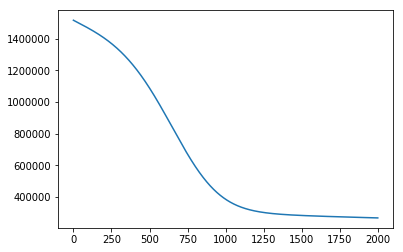

In [26]:
plt.plot(j_history)

In [27]:
h = val_x.dot(w1)
y_pred = relu(h).dot(w2)
print(val_y.shape)

(1000, 1)


In [33]:
counter = 0
for i, j in zip(val_y, np.argmax(y_pred, axis=1)):
    print('{}-{}-{}'.format(i,j,i==j))
    if i == j:
        counter += 1

print(val_y.shape[0])
print(counter * 100 / val_y.shape[0])


[3]-5-[False]
[5]-5-[ True]
[5]-4-[False]
[2]-9-[False]
[1]-5-[False]
[10]-9-[False]
[1]-3-[False]
[4]-4-[ True]
[4]-6-[False]
[3]-9-[False]
[4]-5-[False]
[10]-2-[False]
[1]-3-[False]
[1]-3-[False]
[6]-1-[False]
[7]-6-[False]
[2]-4-[False]
[6]-7-[False]
[3]-0-[False]
[2]-4-[False]
[1]-5-[False]
[6]-2-[False]
[2]-7-[False]
[1]-3-[False]
[9]-3-[False]
[1]-5-[False]
[8]-9-[False]
[10]-3-[False]
[9]-4-[False]
[10]-1-[False]
[3]-9-[False]
[10]-2-[False]
[9]-3-[False]
[9]-6-[False]
[3]-8-[False]
[5]-7-[False]
[7]-6-[False]
[8]-2-[False]
[9]-6-[False]
[4]-6-[False]
[7]-0-[False]
[8]-3-[False]
[10]-7-[False]
[10]-0-[False]
[1]-5-[False]
[7]-6-[False]
[7]-5-[False]
[9]-6-[False]
[6]-1-[False]
[5]-5-[ True]
[9]-6-[False]
[9]-6-[False]
[4]-4-[ True]
[5]-5-[ True]
[2]-4-[False]
[6]-9-[False]
[2]-9-[False]
[10]-1-[False]
[3]-5-[False]
[5]-6-[False]
[4]-9-[False]
[8]-8-[ True]
[8]-7-[False]
[7]-6-[False]
[10]-3-[False]
[5]-5-[ True]
[6]-7-[False]
[4]-0-[False]
[7]-5-[False]
[9]-0-[False]
[3]-4-[Fals